Importing Libraries

In [3]:

from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers 
from tensorflow import keras 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling 
from sklearn.model_selection import train_test_split 
  
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 
  
import warnings 
warnings.filterwarnings('ignore') 

Loading and Extracting the Dataset

In [12]:
# Path to the folder containing our dataset
dataset= r'C:\Users\hp\Downloads\traffic_Data'

# Read the label file into a DataFrame
labelfile = pd.read_csv(r'C:\Users\hp\Downloads\labels.csv')

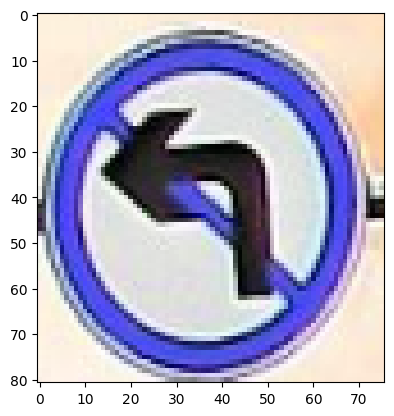

In [13]:
# Visualize some images from the dataset 
img = cv2.imread(r"C:\Users\hp\Downloads\traffic_Data\DATA\11\011_1_0053.png") 
plt.imshow(img) 

In [14]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [15]:
labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


Data Preparation for Training

In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
															subset='training', 
															image_size=( 
																224, 224), 
															seed=123, 
															batch_size=32) 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2, 
															subset='validation', 
															image_size=( 
																224, 224), 
															seed=123, 
															batch_size=32) 


Found 6164 files belonging to 2 classes.
Using 4932 files for training.
Found 6164 files belonging to 2 classes.
Using 1232 files for validation.


In [25]:
class_names = [] 
for i in range(57): 
    class_names.append(labelfile['Name'][int(i)])

print(class_names)     

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [26]:

class_numbers = train_ds.class_names 

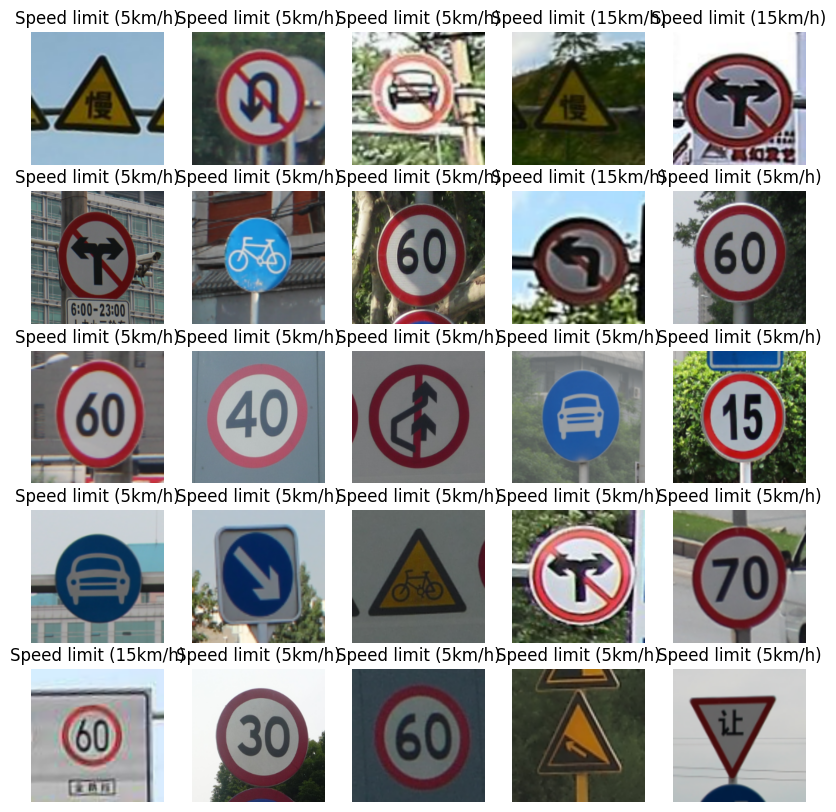

In [27]:
plt.figure(figsize=(10, 10)) 
for images, labels in train_ds.take(1): 
	for i in range(25): 
		ax = plt.subplot(5, 5, i + 1) 
		plt.imshow(images[i].numpy().astype("uint8")) 
		plt.title(class_names[labels[i]]) 
		plt.axis("off") 

plt.show() 


Data Augmentation

In [28]:
data_augmentation = tf.keras.Sequential( 
	[ 
		tf.keras.layers.experimental.preprocessing.RandomFlip( 
			"horizontal", input_shape=(224, 224, 3)), 
		tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), 
		tf.keras.layers.experimental.preprocessing.RandomZoom(0.2), 
		tf.keras.layers.experimental.preprocessing.RandomFlip( 
			mode="horizontal_and_vertical") 
	] 
) 

Model Architecture

In [29]:
model = Sequential() 
model.add(data_augmentation) 
model.add(Rescaling(1./255)) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(256, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(len(labelfile), activation='softmax')) 

summary of the model

In [30]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [35]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
			optimizer='adam', 
			metrics=['accuracy']) 

Model Training 

In [38]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)] 
history = model.fit(train_ds, 
				validation_data=val_ds, 
				epochs=5, 
				callbacks=mycallbacks) 


Epoch 1/5
155/155 [==============================] - 1049s 7s/step - loss: 0.6152 - accuracy: 0.6912 - val_loss: 0.4993 - val_accuracy: 0.7581
Epoch 2/5
155/155 [==============================] - 1000s 6s/step - loss: 0.4879 - accuracy: 0.7768 - val_loss: 0.4023 - val_accuracy: 0.8312
Epoch 3/5
155/155 [==============================] - 1088s 7s/step - loss: 0.4341 - accuracy: 0.8171 - val_loss: 0.3632 - val_accuracy: 0.8515
Epoch 4/5
155/155 [==============================] - 977s 6s/step - loss: 0.4241 - accuracy: 0.8189 - val_loss: 0.3893 - val_accuracy: 0.8312
Epoch 5/5
155/155 [==============================] - 1025s 7s/step - loss: 0.3985 - accuracy: 0.8333 - val_loss: 0.3436 - val_accuracy: 0.8677


Model Evaluation

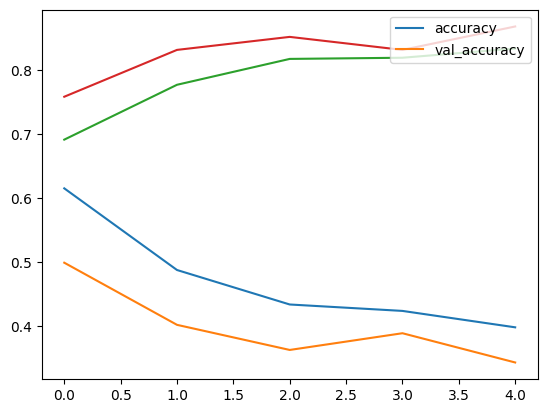

In [40]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')